# **Addis Ababa University**
# **Institute of Techonology**
# **School Of Information Techonology and Engineering**
# ***NLP Topic Modeling Project***

By:
# **Name: Tadele Melesse**
## ID: GSR/5701/14 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing all the necessasry liberaries**

In [ ]:

import pandas as pd
import numpy as np
import time
import csv
import re
from pprint import pprint
import joblib
import sys

#NLP
import sklearn
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
#Load Libraries
import matplotlib.pyplot as plt
import itertools
import time
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn import svm
from sklearn import metrics
#save and loading models
import joblib

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import VotingClassifier,RandomForestClassifier, BaggingClassifier, AdaBoostClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

# **Opening each text file catagories**

In [ ]:
with open('/content/drive/MyDrive/Tade_EPA_data_and_code/ማህበራዊ.txt', 'r') as mahberawi:
    mahb=mahberawi.read()
    print(mahb[:100000])
#separate each files with ***
print("*****************************************************************************************")
with open('/content/drive/MyDrive/Tade_EPA_data_and_code/ኢኮኖሚ.txt', 'r', errors='ignore') as economy:
    eco=economy.read()
    print(eco[:100000])
#separate each files with ***
print("*****************************************************************************************")
with open('/content/drive/MyDrive/ስፖርት.txt', 'r', errors='ignore') as sportEnt:
  spo=sportEnt.read()
  print(spo[:100000])
#separate each files with ***
print("*****************************************************************************************")
with open('/content/drive/MyDrive/Tade_EPA_data_and_code/ዜና/ዓለም አቀፍ.txt', 'r') as worldNews:
    world=worldNews.read()
    print(world[:100000])
#separate each files with ***
print("*****************************************************************************************")
with open('/content/drive/MyDrive/Tade_EPA_data_and_code/ዜና/የሀገር ውስጥ.txt', 'r') as localNews:
    local=localNews.read()
    print(local[:100000])
#separate each files with ***
print("*****************************************************************************************")
with open('/content/drive/MyDrive/Tade_EPA_data_and_code/ወቅታዊ እና ፖለቲካ.txt', 'r') as politics:
    poli=politics.read()
    print(poli[:100000])
#separate each files with ***
print("*****************************************************************************************")

የኢትዮጵያና የቻይና ግንኙነት ከግማሽ ክፍለ ዘመናት በላይ የተሻገረ ነው፡፡ በእነዚህ ዓመታትም ሁለቱ ሀገራት የሕዝቦቻቸውን ጥቅም የሚያስከብሩ ተግባራት ከማከናወናቸውም ባሻገር የርስ በርስ መተሳሰብንና መተማመንን በማስቀደም ተምሳሌታዊ ግንኙነት መፍጠር ችለዋል፡፡
ኢትዮጵያ በየዘመናቱ የሚያጋጥሟትን ሰው ሠራሽና የተፈጥሮ አደጋዎችን ለመሻገር የምታደርገውን ጥረት በማገዝ ቻይና የበኩሏን እገዛ ስታደርግ ቆይታለች፡፡ ለአብነትም ዓለም አቀፍ ወረርሽኝ የሆነውን ኮቪድ 19 በመከላከሉ ረገድ ቻይና ያደረገችው ድጋፍ የሚዘነጋ አይደለም፡፡ የቻይና መንግሥት ኢትዮጵያ እያካሄደች ላለችው የጸረ ኮቪድ 19 ዘመቻ ከ12 ነጥብ 2 ሚሊዮን ዶዝ በላይ ክትባት በመለገስ ለኢትዮጵያ ሕዝብ ያለውን ወገንተኝነት ማሳየት ችሏል፡፡
የኢትዮጵያ መንግሥት በበኩሉ ቻይና በኮቪድ ወረርሽኝ በተጠቃችበትና በዚሁ ምክንያትም መላው ዓለም ወደ ቻይና በረራ በሰረዘበት ወቅት በብቸኝነት በረራ በማድረግ በችግር ጊዜም ቢሆን የቻይናና ኢትዮጵያ ሕዝብ እንደማይለያዩ ያስመሰከረበት ታሪካዊ ሁነት መቼም የሚረሳ አይደለም፡፡ በወቅቱም የዓለም ሀገራት ወደ ቻይና በረራ ባቆሙበት ወቅት የኢትዮጵያ መንግስት በብቸኝነት የወሰደው ጥንቃቄ የተሞላበት ርምጃ ከቻይና መንግሥትና ሕዝብ አድናቆት የተቸረው እንደነበር የሚታወስ ነው፡፤
ኢትዮጵያ በየጊዜው የሚያጋጥሟትን ሰብዓዊ ቀውሶች በማቃለል ረገድም የቻይና መንግሥት ድጋፍ የማይነጥፍ ነው፡፡ በተለይም በሰሜኑ የሀገሪቱ ክፍል በነበረው ጦርነት ለተጎዱ ዜጎች የቻይና መንግሥት ከ30 ሚሊዮን የቻይና ዩዋን በላይ ድጋፍ አድርጓል፡፡ ከዚሁ ጎን ለጎንም ኢትዮጵያ የምታከናውናቸውን የተለያዩ ልማቶችን በመደገፍም የቻይናን መንግሥት አበረታች አስተዋፅዖ በማደረግ ላይ ይገኛል፡፡
የቅርቡን እንኳን 

# **Merging each text files to one text value**

In [ ]:

mah = ' '.join(mahb.splitlines())
pol = ' '.join(poli.splitlines())
alem = ' '.join(world.splitlines())
hager = ' '.join(local.splitlines())
econ = ' '.join(eco.splitlines())
sport = ' '.join(spo.splitlines())
epa_file=[mah, pol, alem, econ, sport, hager]
print(epa_file[4][:1000])

በኢትዮጵያ ስፖርት አካዳሚ ስር ጥሩነሽ ዲባባ ስፖርት ማሰልጠኛ ማዕከል የተመሰረተው እኤአ በ2008 ነበር። በቤጂንግ ኦሊምፒክ ሁለቱ የምንጊዜም የረጅም ርቀት ድንቅ አትሌቶች ቀነኒሳ በቀለና ጥሩነሽ ዲባባ አራት የወርቅ ሜዳሊያዎችን ማስመዝገባቸውን ተከትሎ እነሱ በፈለቁበት አካባቢ ይበልጥ ተተኪዎችን ለማፍራት የወጣቶች ማሰልጠኛ ማዕከሉ በጥሩነሽ ዲባባ ስም ተቋቁማል። ማሰልጠኛ ማዕከሉ በወቅቱ ከ200 በላይ ሰልጣኞችን በመመልመል ወደ ስራ የገባ ሲሆን፤ ለአራት ዓመት ሳይንሳዊና ዘመናዊ ስልጠናዎችን በመስጠት በተለያዩ ስፖርቶች ብቁ አድርጎ ያስመርቃል። ማዕከሉ ስልጠናውን መስጠት ከጀመረበት ወቅት አንስቶም ለአስራ አንድና አስራ ሁለት ዞሮች ሰልጣኞችን ማስመረቅ ችሏል። በአሁኑ ወቅት ማሰልጠኛ ማዕከሉ 179 ወንድና 131 ሴት በድምሩ ለ310 ሰልጣኞች ስልጠና በመስጠት ላይ ይገኛል። ከነዚህ ሰልጣኞች መካከል 101 አዲስና 270 ነባር ሰልጣኞችን በመያዝ ከአንደኛ እስከ አራተኛ ዓመት ስልጠናዎችን ይሰጣል። የማሰልጠኛ ማዕከሉ የትምህርት ስልጠናና ውድድር ምክትል ዳይሬክተር ተወካይ አቶ መሳይ ጉልላት፣ ማዕከሉ አገር አቀፍ እንደመሆኑ የምልመላ ሂደቱም ሁሉን አቀፍና ችሎታን መሰረት ያደረገ መሆኑን ይናገራሉ። በአገሪቱ ሁሉም ክልሎችና ከተማ አስተዳደሮች ምልመላ በማካሄድም ነው ለወጣቶች ስልጠናው የሚሰጠው። ምልመላው የሰላም ስጋት በነበረባቸው እንደ ትግራይ ክልል ካሉት አከባቢዎች በስተቀር በሁሉም አካባዎች ሲደረግ ቆይታል። ለዚህም ማዕከሉ ‹‹ችሎታን(ታለንትን) መፈልግ እንጂ በራሱ ይምጣ›› የሚል እምነት ስለሌለው በተለያየ አካባቢ እየተጋዘ እንደሚመለምል አቶ መሳይ ገልፀዋል። ኢትዮጵያ ወጣቶች ስፖርት አካዳሚ በአስር የስፖርት አይነቶች ስልጠና ይሰጣል። ጥሩነሽ ዲባባ ማሰልጠኛ ማ

# **Cleaning unecessary characters, symbols and puctuations**

In [ ]:
def remove_punc(string):
    punc='\!\@\#\$\%\^\«\»\&\*\(\)\…\[\]\{\}\:\;\“\”\›\’\‘\፣\”\“\።\\።\›\›\፤\,\–\።\"\÷\’\”\፣\“\_\-\:\-\_\,\.\=\‹\/\<\>\?\\|`\´\~\-\=\+\፡\።\፤\;\፦\፥\፧\፨\፠\፣\።\!\?\፡\፡\/\%'
    for ele in string:  
        if ele in punc:  
            string = string.replace(ele, " ") 
    return string
 
text_W= remove_punc(epa_file) 
print(text_W[4][:100000]) # cleaned list


በኢትዮጵያ ስፖርት አካዳሚ ስር ጥሩነሽ ዲባባ ስፖርት ማሰልጠኛ ማዕከል የተመሰረተው እኤአ በ2008 ነበር። በቤጂንግ ኦሊምፒክ ሁለቱ የምንጊዜም የረጅም ርቀት ድንቅ አትሌቶች ቀነኒሳ በቀለና ጥሩነሽ ዲባባ አራት የወርቅ ሜዳሊያዎችን ማስመዝገባቸውን ተከትሎ እነሱ በፈለቁበት አካባቢ ይበልጥ ተተኪዎችን ለማፍራት የወጣቶች ማሰልጠኛ ማዕከሉ በጥሩነሽ ዲባባ ስም ተቋቁማል። ማሰልጠኛ ማዕከሉ በወቅቱ ከ200 በላይ ሰልጣኞችን በመመልመል ወደ ስራ የገባ ሲሆን፤ ለአራት ዓመት ሳይንሳዊና ዘመናዊ ስልጠናዎችን በመስጠት በተለያዩ ስፖርቶች ብቁ አድርጎ ያስመርቃል። ማዕከሉ ስልጠናውን መስጠት ከጀመረበት ወቅት አንስቶም ለአስራ አንድና አስራ ሁለት ዞሮች ሰልጣኞችን ማስመረቅ ችሏል። በአሁኑ ወቅት ማሰልጠኛ ማዕከሉ 179 ወንድና 131 ሴት በድምሩ ለ310 ሰልጣኞች ስልጠና በመስጠት ላይ ይገኛል። ከነዚህ ሰልጣኞች መካከል 101 አዲስና 270 ነባር ሰልጣኞችን በመያዝ ከአንደኛ እስከ አራተኛ ዓመት ስልጠናዎችን ይሰጣል። የማሰልጠኛ ማዕከሉ የትምህርት ስልጠናና ውድድር ምክትል ዳይሬክተር ተወካይ አቶ መሳይ ጉልላት፣ ማዕከሉ አገር አቀፍ እንደመሆኑ የምልመላ ሂደቱም ሁሉን አቀፍና ችሎታን መሰረት ያደረገ መሆኑን ይናገራሉ። በአገሪቱ ሁሉም ክልሎችና ከተማ አስተዳደሮች ምልመላ በማካሄድም ነው ለወጣቶች ስልጠናው የሚሰጠው። ምልመላው የሰላም ስጋት በነበረባቸው እንደ ትግራይ ክልል ካሉት አከባቢዎች በስተቀር በሁሉም አካባዎች ሲደረግ ቆይታል። ለዚህም ማዕከሉ ‹‹ችሎታን(ታለንትን) መፈልግ እንጂ በራሱ ይምጣ›› የሚል እምነት ስለሌለው በተለያየ አካባቢ እየተጋዘ እንደሚመለምል አቶ መሳይ ገልፀዋል። ኢትዮጵያ ወጣቶች ስፖርት አካዳሚ በአስር የስፖርት አይነቶች ስልጠና ይሰጣል። ጥሩነሽ ዲባባ ማሰልጠኛ ማ

In [ ]:

def remove_asc_numbers(text):
    rm=r'[@#$%^«»&*…”““፤/()\xa0‹‹››A-Za-z0-9።፡-፣!_-]'
    filtered = re.sub(rm, ' ', text)
    return filtered
ws=[remove_asc_numbers(i) for i in text_W]
ws[4][:100000] # cleaned list

'በኢትዮጵያ ስፖርት አካዳሚ ስር ጥሩነሽ ዲባባ ስፖርት ማሰልጠኛ ማዕከል የተመሰረተው እኤአ በ     ነበር  በቤጂንግ ኦሊምፒክ ሁለቱ የምንጊዜም የረጅም ርቀት ድንቅ አትሌቶች ቀነኒሳ በቀለና ጥሩነሽ ዲባባ አራት የወርቅ ሜዳሊያዎችን ማስመዝገባቸውን ተከትሎ እነሱ በፈለቁበት አካባቢ ይበልጥ ተተኪዎችን ለማፍራት የወጣቶች ማሰልጠኛ ማዕከሉ በጥሩነሽ ዲባባ ስም ተቋቁማል  ማሰልጠኛ ማዕከሉ በወቅቱ ከ    በላይ ሰልጣኞችን በመመልመል ወደ ስራ የገባ ሲሆን  ለአራት ዓመት ሳይንሳዊና ዘመናዊ ስልጠናዎችን በመስጠት በተለያዩ ስፖርቶች ብቁ አድርጎ ያስመርቃል  ማዕከሉ ስልጠናውን መስጠት ከጀመረበት ወቅት አንስቶም ለአስራ አንድና አስራ ሁለት ዞሮች ሰልጣኞችን ማስመረቅ ችሏል  በአሁኑ ወቅት ማሰልጠኛ ማዕከሉ     ወንድና     ሴት በድምሩ ለ    ሰልጣኞች ስልጠና በመስጠት ላይ ይገኛል  ከነዚህ ሰልጣኞች መካከል     አዲስና     ነባር ሰልጣኞችን በመያዝ ከአንደኛ እስከ አራተኛ ዓመት ስልጠናዎችን ይሰጣል  የማሰልጠኛ ማዕከሉ የትምህርት ስልጠናና ውድድር ምክትል ዳይሬክተር ተወካይ አቶ መሳይ ጉልላት  ማዕከሉ አገር አቀፍ እንደመሆኑ የምልመላ ሂደቱም ሁሉን አቀፍና ችሎታን መሰረት ያደረገ መሆኑን ይናገራሉ  በአገሪቱ ሁሉም ክልሎችና ከተማ አስተዳደሮች ምልመላ በማካሄድም ነው ለወጣቶች ስልጠናው የሚሰጠው  ምልመላው የሰላም ስጋት በነበረባቸው እንደ ትግራይ ክልል ካሉት አከባቢዎች በስተቀር በሁሉም አካባዎች ሲደረግ ቆይታል  ለዚህም ማዕከሉ   ችሎታን ታለንትን  መፈልግ እንጂ በራሱ ይምጣ   የሚል እምነት ስለሌለው በተለያየ አካባቢ እየተጋዘ እንደሚመለምል አቶ መሳይ ገልፀዋል  ኢትዮጵያ ወጣቶች ስፖርት አካዳሚ በአስር የስፖርት አይነቶች ስልጠና ይሰጣል  ጥሩነሽ ዲባባ ማሰልጠኛ 

# **Amharic stopwords taken from** "https://github.com/Amharic-NLP/StopWords"

In [ ]:
amharic_stopwords=["ግን","አንቺ","አንተ","እናንተ","እና","ያንተ","ያንቺ","የናንተ","ራስህን","ራስሽን","ራሳችሁን","ሁሉ","ኋላ","በሰሞኑ","አሉ","በኋላ","ሁኔታ","በኩል","አስታውቀዋል","ሆነ","ነው፡፡","በውስጥ","አስታውሰዋል","ሆኑ","ባጣም","እስካሁን","ሆኖም","በተለይ","አሳሰበ","ሁል","በተመለከተ","አሳስበዋል","ላይ","በተመሳሳይ","አስፈላጊ","ሌላ","የተለያየ","አስገነዘቡ","ሌሎች","የተለያዩ","አስገንዝበዋል","ልዩ","ተባለ","አብራርተዋል","መሆኑ","ተገለጸ","አስረድተዋል","ተገልጿል","ማለቱ","ተጨማሪ","እባክህ","የሚገኝ","ተከናወነ","እባክሽ","ማድረግ","ችግር","አንጻር","ማን","ትናንት","እስኪደርስ","ነበረች","እንኳ","ሰሞኑን","ነበሩ","እንኳን","ሲሆን","ነበር","እዚሁ","ሲል","ነው","እንደገለጹት","አለ","ና","እንደተናገሩት","ቢሆን","ነገር","እንዳስረዱት","ብለዋል","ነገሮች","እንደገና","ብዙ","ናት","ወቅት","ቦታ","ናቸው","እንዲሁም","በርካታ","አሁን","እንጂ","እስከ","ማለት","የሚሆኑት","ስለማናቸውም","ውስጥ","ይሆናሉ","ሲባል","ከሆነው","ስለዚሁ","ከአንድ","ያልሆነ","ሳለ","የነበረውን","ከአንዳንድ","በማናቸውም","በሙሉ","የሆነው","ያሉ","በእነዚሁ","ወር","መሆናቸው","ከሌሎች","በዋና","አንዲት","ወይም","በላይ","እንደ","በማቀድ","ለሌሎች","በሆኑ","ቢሆንም","ጊዜና","ይሆኑበታል","በሆነ","አንዱ","ለዚህ","ለሆነው","ለነዚህ","ከዚህ","የሌላውን","ሶስተኛ","አንዳንድ","ለማንኛውም","የሆነ","ከሁለት","የነገሩ","ሰኣት","አንደኛ","እንዲሆን","እንደነዚህ","ማንኛውም","ካልሆነ","የሆኑት","ጋር","ቢያንስ","ይህንንም","እነደሆነ","እነዚህን","ይኸው","የማናቸውም","በሙሉም","ይህችው","በተለይም","አንዱን","የሚችለውን","በነዚህ","ከእነዚህ","በሌላ","የዚሁ","ከእነዚሁ","ለዚሁ","በሚገባ","ለእያንዳንዱ","የአንቀጹ","ወደ","ይህም","ስለሆነ","ወይ","ማናቸውንም","ተብሎ","እነዚህ","መሆናቸውን","የሆነችን","ከአስር","ሳይሆን","ከዚያ","የለውም","የማይበልጥ","እንደሆነና","እንዲሆኑ","በሚችሉ","ብቻ","ብሎ","ከሌላ","የሌላቸውን","ለሆነ","በሌሎች","ሁለቱንም","በቀር","ይህ","በታች","አንደሆነ","በነሱ","ይህን","የሌላ","እንዲህ","ከሆነ","ያላቸው","በነዚሁ","በሚል","የዚህ","ይህንኑ","በእንደዚህ","ቁጥር","ማናቸውም","ሆነው","ባሉ","በዚህ","በስተቀር","ሲሆንና","በዚህም","መሆን","ምንጊዜም","እነዚህም","በዚህና","ያለ","ስም","ሲኖር","ከዚህም","መሆኑን","በሁኔታው","የማያንስ","እነዚህኑ","ማንም","ከነዚሁ","ያላቸውን","እጅግ","ሲሆኑ","ለሆኑ","ሊሆን","ለማናቸውም"]
amharic_stopwords

['ግን',
 'አንቺ',
 'አንተ',
 'እናንተ',
 'እና',
 'ያንተ',
 'ያንቺ',
 'የናንተ',
 'ራስህን',
 'ራስሽን',
 'ራሳችሁን',
 'ሁሉ',
 'ኋላ',
 'በሰሞኑ',
 'አሉ',
 'በኋላ',
 'ሁኔታ',
 'በኩል',
 'አስታውቀዋል',
 'ሆነ',
 'ነው፡፡',
 'በውስጥ',
 'አስታውሰዋል',
 'ሆኑ',
 'ባጣም',
 'እስካሁን',
 'ሆኖም',
 'በተለይ',
 'አሳሰበ',
 'ሁል',
 'በተመለከተ',
 'አሳስበዋል',
 'ላይ',
 'በተመሳሳይ',
 'አስፈላጊ',
 'ሌላ',
 'የተለያየ',
 'አስገነዘቡ',
 'ሌሎች',
 'የተለያዩ',
 'አስገንዝበዋል',
 'ልዩ',
 'ተባለ',
 'አብራርተዋል',
 'መሆኑ',
 'ተገለጸ',
 'አስረድተዋል',
 'ተገልጿል',
 'ማለቱ',
 'ተጨማሪ',
 'እባክህ',
 'የሚገኝ',
 'ተከናወነ',
 'እባክሽ',
 'ማድረግ',
 'ችግር',
 'አንጻር',
 'ማን',
 'ትናንት',
 'እስኪደርስ',
 'ነበረች',
 'እንኳ',
 'ሰሞኑን',
 'ነበሩ',
 'እንኳን',
 'ሲሆን',
 'ነበር',
 'እዚሁ',
 'ሲል',
 'ነው',
 'እንደገለጹት',
 'አለ',
 'ና',
 'እንደተናገሩት',
 'ቢሆን',
 'ነገር',
 'እንዳስረዱት',
 'ብለዋል',
 'ነገሮች',
 'እንደገና',
 'ብዙ',
 'ናት',
 'ወቅት',
 'ቦታ',
 'ናቸው',
 'እንዲሁም',
 'በርካታ',
 'አሁን',
 'እንጂ',
 'እስከ',
 'ማለት',
 'የሚሆኑት',
 'ስለማናቸውም',
 'ውስጥ',
 'ይሆናሉ',
 'ሲባል',
 'ከሆነው',
 'ስለዚሁ',
 'ከአንድ',
 'ያልሆነ',
 'ሳለ',
 'የነበረውን',
 'ከአንዳንድ',
 'በማናቸውም',
 'በሙሉ',
 'የሆነው',
 'ያሉ',
 'በእነዚሁ',
 'ወር',
 'መሆናቸው',
 'ከሌሎች',
 'በዋና',
 'አንዲት',
 '

# **Tokenization, Normalization and Removing stop words and single amharic characters**

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set("amharic_stopwords")
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.split() if i not in stop])
    stop_free = " ".join([i for i in doc.split() if len(i) > 1])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized


doc_clean = [clean(doc).split() for doc in ws]  
print(doc_clean[0][:100000])
print(len(doc_clean))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


['የኢትዮጵያና', 'የቻይና', 'ግንኙነት', 'ከግማሽ', 'ክፍለ', 'ዘመናት', 'በላይ', 'የተሻገረ', 'ነው', 'በእነዚህ', 'ዓመታትም', 'ሁለቱ', 'ሀገራት', 'የሕዝቦቻቸውን', 'ጥቅም', 'የሚያስከብሩ', 'ተግባራት', 'ከማከናወናቸውም', 'ባሻገር', 'የርስ', 'በርስ', 'መተሳሰብንና', 'መተማመንን', 'በማስቀደም', 'ተምሳሌታዊ', 'ግንኙነት', 'መፍጠር', 'ችለዋል', 'ኢትዮጵያ', 'በየዘመናቱ', 'የሚያጋጥሟትን', 'ሰው', 'ሠራሽና', 'የተፈጥሮ', 'አደጋዎችን', 'ለመሻገር', 'የምታደርገውን', 'ጥረት', 'በማገዝ', 'ቻይና', 'የበኩሏን', 'እገዛ', 'ስታደርግ', 'ቆይታለች', 'ለአብነትም', 'ዓለም', 'አቀፍ', 'ወረርሽኝ', 'የሆነውን', 'ኮቪድ', 'በመከላከሉ', 'ረገድ', 'ቻይና', 'ያደረገችው', 'ድጋፍ', 'የሚዘነጋ', 'አይደለም', 'የቻይና', 'መንግሥት', 'ኢትዮጵያ', 'እያካሄደች', 'ላለችው', 'የጸረ', 'ኮቪድ', 'ዘመቻ', 'ነጥብ', 'ሚሊዮን', 'ዶዝ', 'በላይ', 'ክትባት', 'በመለገስ', 'ለኢትዮጵያ', 'ሕዝብ', 'ያለውን', 'ወገንተኝነት', 'ማሳየት', 'ችሏል', 'የኢትዮጵያ', 'መንግሥት', 'በበኩሉ', 'ቻይና', 'በኮቪድ', 'ወረርሽኝ', 'በተጠቃችበትና', 'በዚሁ', 'ምክንያትም', 'መላው', 'ዓለም', 'ወደ', 'ቻይና', 'በረራ', 'በሰረዘበት', 'ወቅት', 'በብቸኝነት', 'በረራ', 'በማድረግ', 'በችግር', 'ጊዜም', 'ቢሆን', 'የቻይናና', 'ኢትዮጵያ', 'ሕዝብ', 'እንደማይለያዩ', 'ያስመሰከረበት', 'ታሪካዊ', 'ሁነት', 'መቼም', 'የሚረሳ', 'አይደለም', 'በወቅቱም', 'የዓለም', 'ሀገራት', 'ወደ', 'ቻይና', 'በረራ', 'ባቆሙበት', 'ወቅት', 'የኢትዮጵያ', 'መንግስ

In [ ]:
import re
def normalize(input_token):
        rep1=re.sub('[ሃኅኃሐሓኻ]','ሀ',input_token)
        rep2=re.sub('[ሑኁዅ]','ሁ',rep1)
        rep3=re.sub('[ኂሒኺ]','ሂ',rep2)
        rep4=re.sub('[ኌሔዄ]','ሄ',rep3)
        rep5=re.sub('[ሕኅ]','ህ',rep4)
        rep6=re.sub('[ኆሖኾ]','ሆ',rep5)
        rep7=re.sub('[ሠ]','ሰ',rep6)
        rep8=re.sub('[ሡ]','ሱ',rep7)
        rep9=re.sub('[ሢ]','ሲ',rep8)
        rep10=re.sub('[ሣ]','ሳ',rep9)
        rep11=re.sub('[ሤ]','ሴ',rep10)
        rep12=re.sub('[ሥ]','ስ',rep11)
        rep13=re.sub('[ሦ]','ሶ',rep12)
        rep14=re.sub('[ዓኣዐ]','አ',rep13)
        rep15=re.sub('[ዑ]','ኡ',rep14)
        rep16=re.sub('[ዒ]','ኢ',rep15)
        rep17=re.sub('[ዔ]','ኤ',rep16)
        rep18=re.sub('[ዕ]','እ',rep17)
        rep19=re.sub('[ዖ]','ኦ',rep18)
        rep20=re.sub('[ጸ]','ፀ',rep19)
        rep21=re.sub('[ጹ]','ፁ',rep20)
        rep22=re.sub('[ጺ]','ፂ',rep21)
        rep23=re.sub('[ጻ]','ፃ',rep22)
        rep24=re.sub('[ጼ]','ፄ',rep23)
        rep25=re.sub('[ጽ]','ፅ',rep24)
        rep26=re.sub('[ጾ]','ፆ',rep25)
        #Normalizing words with Labialized Amharic characters such as በልቱዋል or  በልቱአል to  በልቷል  
        rep27=re.sub('(ሉ[ዋአ])','ሏ',rep26)
        rep28=re.sub('(ሙ[ዋአ])','ሟ',rep27)
        rep29=re.sub('(ቱ[ዋአ])','ቷ',rep28)
        rep30=re.sub('(ሩ[ዋአ])','ሯ',rep29)
        rep31=re.sub('(ሱ[ዋአ])','ሷ',rep30)
        rep32=re.sub('(ሹ[ዋአ])','ሿ',rep31)
        rep33=re.sub('(ቁ[ዋአ])','ቋ',rep32)
        rep34=re.sub('(ቡ[ዋአ])','ቧ',rep33)
        rep35=re.sub('(ቹ[ዋአ])','ቿ',rep34)
        rep36=re.sub('(ሁ[ዋአ])','ኋ',rep35)
        rep37=re.sub('(ኑ[ዋአ])','ኗ',rep36)
        rep38=re.sub('(ኙ[ዋአ])','ኟ',rep37)
        rep39=re.sub('(ኩ[ዋአ])','ኳ',rep38)
        rep40=re.sub('(ዙ[ዋአ])','ዟ',rep39)
        rep41=re.sub('(ጉ[ዋአ])','ጓ',rep40)
        rep42=re.sub('(ደ[ዋአ])','ዷ',rep41)
        rep43=re.sub('(ጡ[ዋአ])','ጧ',rep42)
        rep44=re.sub('(ጩ[ዋአ])','ጯ',rep43)
        rep45=re.sub('(ጹ[ዋአ])','ጿ',rep44)
        rep46=re.sub('(ፉ[ዋአ])','ፏ',rep45)
        rep47=re.sub('[ቊ]','ቁ',rep46) #ቁ can be written as ቊ
        rep48=re.sub('[ኵ]','ኩ',rep47) #ኩ can be also written as ኵ  
        
        return rep48
mahiberawi= [normalize(d) for d in doc_clean[0]]
print(len(mahiberawi))
print(mahiberawi[:100000])
politics= [normalize(d) for d in doc_clean[1]]
print(len(politics))
print(politics[:100000])
alemZena= [normalize(d) for d in doc_clean[2]]
print(len(alemZena))
print(alemZena[:100000])
economy= [normalize(d) for d in doc_clean[3]]
print(len(economy))
print(economy[:100000])
sport= [normalize(d) for d in doc_clean[4]]
print(len(sport))
print(sport[:100000])
hagerZena= [normalize(d) for d in doc_clean[5]]
print(len(hagerZena))
print(hagerZena[:100000])


1493272
['የኢትዮጵያና', 'የቻይና', 'ግንኙነት', 'ከግማሽ', 'ክፍለ', 'ዘመናት', 'በላይ', 'የተሻገረ', 'ነው', 'በእነዚህ', 'አመታትም', 'ሁለቱ', 'ሀገራት', 'የህዝቦቻቸውን', 'ጥቅም', 'የሚያስከብሩ', 'ተግባራት', 'ከማከናወናቸውም', 'ባሻገር', 'የርስ', 'በርስ', 'መተሳሰብንና', 'መተማመንን', 'በማስቀደም', 'ተምሳሌታዊ', 'ግንኙነት', 'መፍጠር', 'ችለዋል', 'ኢትዮጵያ', 'በየዘመናቱ', 'የሚያጋጥሟትን', 'ሰው', 'ሰራሽና', 'የተፈጥሮ', 'አደጋዎችን', 'ለመሻገር', 'የምታደርገውን', 'ጥረት', 'በማገዝ', 'ቻይና', 'የበኩሏን', 'እገዛ', 'ስታደርግ', 'ቆይታለች', 'ለአብነትም', 'አለም', 'አቀፍ', 'ወረርሽኝ', 'የሆነውን', 'ኮቪድ', 'በመከላከሉ', 'ረገድ', 'ቻይና', 'ያደረገችው', 'ድጋፍ', 'የሚዘነጋ', 'አይደለም', 'የቻይና', 'መንግስት', 'ኢትዮጵያ', 'እያካሄደች', 'ላለችው', 'የፀረ', 'ኮቪድ', 'ዘመቻ', 'ነጥብ', 'ሚሊዮን', 'ዶዝ', 'በላይ', 'ክትባት', 'በመለገስ', 'ለኢትዮጵያ', 'ህዝብ', 'ያለውን', 'ወገንተኝነት', 'ማሳየት', 'ችሏል', 'የኢትዮጵያ', 'መንግስት', 'በበኩሉ', 'ቻይና', 'በኮቪድ', 'ወረርሽኝ', 'በተጠቃችበትና', 'በዚሁ', 'ምክንያትም', 'መላው', 'አለም', 'ወደ', 'ቻይና', 'በረራ', 'በሰረዘበት', 'ወቅት', 'በብቸኝነት', 'በረራ', 'በማድረግ', 'በችግር', 'ጊዜም', 'ቢሆን', 'የቻይናና', 'ኢትዮጵያ', 'ህዝብ', 'እንደማይለያዩ', 'ያስመሰከረበት', 'ታሪካዊ', 'ሁነት', 'መቼም', 'የሚረሳ', 'አይደለም', 'በወቅቱም', 'የአለም', 'ሀገራት', 'ወደ', 'ቻይና', 'በረራ', 'ባቆሙበት', 'ወቅት', 'የኢትዮጵያ

In [ ]:
allfile=[mahiberawi, politics, alemZena, economy, sport, hagerZena]
print(len(allfile))

6


# **Creating document files from each topic catagories**

In [ ]:
def join_nested_list(nested_list, chunk_size):
    """
    Joins a list of lists into smaller chunks of a specified size.

    :param nested_list: A list of lists.
    :param chunk_size: The number of items in each chunk.
    :return: A list of nested chunks.
    """
    nested_chunks = []
    for word_list in nested_list:
        word_chunks = []
        for i in range(0, len(word_list), chunk_size):
            word_chunks.append(' '.join(word_list[i:i + chunk_size]))
        nested_chunks.append(word_chunks)
    return nested_chunks
chunk_size = 100

nested_chunks = join_nested_list(allfile, chunk_size)
print(nested_chunks[0][0])
print(len(nested_chunks))
label=['Social','Politics','WorldNews','Economy','Sport','LocalNews']

የኢትዮጵያና የቻይና ግንኙነት ከግማሽ ክፍለ ዘመናት በላይ የተሻገረ ነው በእነዚህ አመታትም ሁለቱ ሀገራት የህዝቦቻቸውን ጥቅም የሚያስከብሩ ተግባራት ከማከናወናቸውም ባሻገር የርስ በርስ መተሳሰብንና መተማመንን በማስቀደም ተምሳሌታዊ ግንኙነት መፍጠር ችለዋል ኢትዮጵያ በየዘመናቱ የሚያጋጥሟትን ሰው ሰራሽና የተፈጥሮ አደጋዎችን ለመሻገር የምታደርገውን ጥረት በማገዝ ቻይና የበኩሏን እገዛ ስታደርግ ቆይታለች ለአብነትም አለም አቀፍ ወረርሽኝ የሆነውን ኮቪድ በመከላከሉ ረገድ ቻይና ያደረገችው ድጋፍ የሚዘነጋ አይደለም የቻይና መንግስት ኢትዮጵያ እያካሄደች ላለችው የፀረ ኮቪድ ዘመቻ ነጥብ ሚሊዮን ዶዝ በላይ ክትባት በመለገስ ለኢትዮጵያ ህዝብ ያለውን ወገንተኝነት ማሳየት ችሏል የኢትዮጵያ መንግስት በበኩሉ ቻይና በኮቪድ ወረርሽኝ በተጠቃችበትና በዚሁ ምክንያትም መላው አለም ወደ ቻይና በረራ በሰረዘበት ወቅት በብቸኝነት በረራ በማድረግ በችግር ጊዜም ቢሆን የቻይናና
6


# **Preparing a CSV file for documents to their topic catagorie**s

In [ ]:
def lists_to_csv(file_path, a, b):
    
    with open(file_path, 'w', newline='') as file:
        writer = csv.writer(file)
        label_count=0
        for val in a:
          for value in val:
            writer.writerow([value, label[label_count]])
          label_count= label_count+1

lists_to_csv('/content/drive/MyDrive/topic_file.csv', nested_chunks, label)


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/topic_file.csv', header=None,names=["text", "label"])
# Shuffle the rows
data = data.sample(frac=1).reset_index(drop=True)

# Save the shuffled data to a new CSV file
data.to_csv("shuffled_data.csv", index=False, header=False)
data.head(-20)


text      label
0      አም በቱርክ አንካራ ከተማ መፈራረማቸው ይታወሳል ስምምነቱ በሁለቱ አገሮች...  LocalNews
1      ተላላፊ ያልሆኑ በሽታዎች ከፍተኛ የጤናና የልማት ችግሮች እየሆኑ መጥተዋል...     Social
2      ለማስፈፀም ጭንቀት ሆኗል የሚሉት ዶክተር ባንተይገኝ ክልሎች የመላው ኢትዮ...   Politics
3      ስምምነትን ሲፈፅሙ የኢትዮጵያ የመከላከያ ሰራዊቱ ከመቀሌ የተወሰነ ኪሎ ሜ...   Politics
4      የሚታበስበት ሩቅ እንዳልሆነ ይሰማኛል ባለፉት ጊዜያት ህወሀት በተለያዩ ማ...   Politics
...                                                  ...        ...
59580  ኮይሻ ግን ሙሉ ለሙሉ ስራው ቆሞ ነበር አሁን ፈተና አለ በምንልበት ሰአት...   Politics
59581  ለአስተዳደር እንዲመቻቸው ግዛት ተከፋፍለው ነበር የሚሉት እነዚህ ወገኖች ...     Social
59582  ከቻሉና ልዩነቶቻችንን ወደ አንድነት የማምጣት ሀይል ካላቸው ከወጡበት ከፍ...   Politics
59583  ህዝብን ይቅርታ መጠየቅ ነው የሚገባው ከሁለት አመት በፊት ብሄራዊ የንስሀ...   Politics
59584  ነው የገታነው ዘንድሮ ነጥብ በመቶ ኢምፖርት አድጓል በየአመቱ ኤክስፖርት ...   Politics

[59585 rows x 2 columns]

In [ ]:
mVal=data.head(25000)
mVal.head(-20)

text      label
0      አም በቱርክ አንካራ ከተማ መፈራረማቸው ይታወሳል ስምምነቱ በሁለቱ አገሮች...  LocalNews
1      ተላላፊ ያልሆኑ በሽታዎች ከፍተኛ የጤናና የልማት ችግሮች እየሆኑ መጥተዋል...     Social
2      ለማስፈፀም ጭንቀት ሆኗል የሚሉት ዶክተር ባንተይገኝ ክልሎች የመላው ኢትዮ...   Politics
3      ስምምነትን ሲፈፅሙ የኢትዮጵያ የመከላከያ ሰራዊቱ ከመቀሌ የተወሰነ ኪሎ ሜ...   Politics
4      የሚታበስበት ሩቅ እንዳልሆነ ይሰማኛል ባለፉት ጊዜያት ህወሀት በተለያዩ ማ...   Politics
...                                                  ...        ...
24975  አረቢያ እንደ መንግስት ሪፎርም እየሰሩ ነው ከዚህ ቀደም በሌሎች ዜጎች ሲ...  LocalNews
24976  አካባቢውን እየተመለከቱ ናቸው ለማልማትም እቅድ እየወጣ ነው የጋሞ ዞን የ...    Economy
24977  ነበር ለምሳሌ የኮሮና ወረርሽኝ የአንበጣ መንጋና ጎርፍ ተጠቃሾች ናቸው ከ...   Politics
24978  አሉታዊ ሁኔታ ወደ አዎንታዊ መቀየር እንደሚያስፈልግም ዶክተር ሳምሶን አመ...  LocalNews
24979  ልክ እንደ ሳንኮፋ ሁሉ በተለያዩ ከፍተኛ የትምህርት ተቋማት ተመሳሳይ እን...     Social

[24980 rows x 2 columns]

In [ ]:
mVal['label'].value_counts(),np.sum(data['label'].value_counts())

(Social       6356
 Politics     6306
 LocalNews    5911
 Economy      4557
 WorldNews    1352
 Sport         518
 Name: label, dtype: int64, 59605)

# **Bar plot to visualize sample feature vs categories**

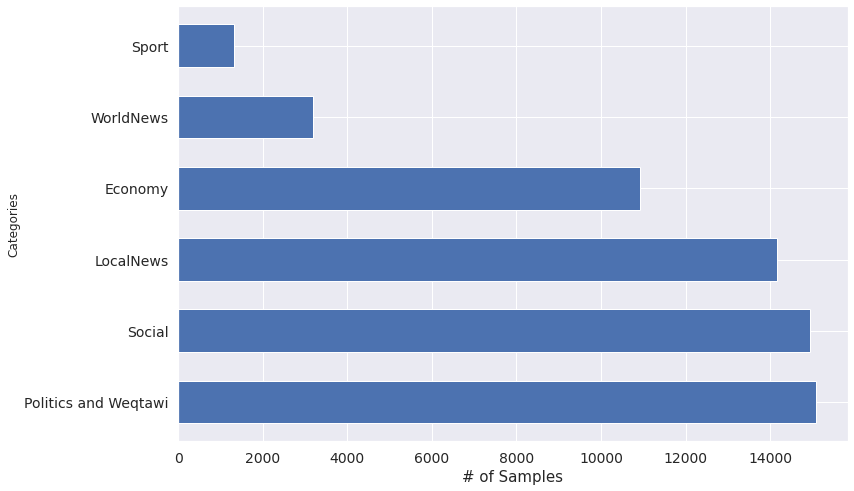

In [ ]:
# Bar plot features vs ML based on AVG ACCuraCY Using ALL four data sets
# See table Table 4 in the manuscript
import pandas as pd 
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt 
df=[["Politics and Weqtawi",15081],
      ["Social",14933],
      ["LocalNews",14163],
      ["Economy",10931],
      ["WorldNews",3186],
      ["Sport",1311],
     ]

df=pd.DataFrame(df,columns=["Categories","NumOfSamples"])
df.plot(x="Categories", y=["NumOfSamples"], kind="barh",rot=0,width=0.6,figsize=(12,8),fontsize=14,legend=False)
plt.xlabel("# of Samples",fontsize=15)
plt.show()

# **Spliting data in to train and test data then performing Tf-IDF word embedding mechanism**

In [ ]:

# split the dataset into training and validation datasets 
train_data, test_data , train_labels, test_labels = train_test_split(data['text'], data['label'],stratify=data['label'], test_size=0.25,random_state=42)

# Create feature vectors
vectorizer = TfidfVectorizer(min_df=5,max_df = 0.8,sublinear_tf=True,use_idf=True)
train_vectors = vectorizer.fit_transform(train_data)
test_vectors = vectorizer.transform(test_data)

In [ ]:
#LDA as feature 
from sklearn.decomposition import LatentDirichletAllocation as LDA
lda = LDA(n_components=6)
lda.fit(train_vectors)
training_ldafeatures = lda.transform(train_vectors)
testing_ldafeatures = lda.transform(test_vectors)


# Tfidf + LDA features
import scipy
new_train = scipy.sparse.hstack((train_vectors, training_ldafeatures),format='csr')
new_test = scipy.sparse.hstack((test_vectors, testing_ldafeatures),format='csr')


In [ ]:
#loading SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline

In [ ]:
#metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, precision_recall_fscore_support
from sklearn import model_selection

In [ ]:
columns = ['Feature','model','scores','metric', 'mean', 'std','time']
results =pd.DataFrame(columns=columns)
from sklearn.metrics import log_loss, make_scorer
LogLoss = make_scorer(log_loss)#, greater_is_better=False, needs_proba=True)
result = []

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results for LR Feature settings  LDA
Training time: 1.637085s; Prediction time: 0.003140s


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Economy       0.00      0.00      0.00      2733
   LocalNews       0.59      0.00      0.01      3541
    Politics       0.26      0.91      0.41      3770
      Social       0.38      0.12      0.18      3733
       Sport       0.94      0.74      0.83       328
   WorldNews       0.88      0.36      0.51       797

    accuracy                           0.30     14902
   macro avg       0.51      0.36      0.32     14902
weighted avg       0.37      0.30      0.20     14902



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

Results for NB Feature settings  LDA
Training time: 0.155266s; Prediction time: 0.001851s


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

     Economy       0.00      0.00      0.00      2733
   LocalNews       0.00      0.00      0.00      3541
    Politics       0.26      1.00      0.41      3770
      Social       0.01      0.00      0.00      3733
       Sport       0.00      0.00      0.00       328
   WorldNews       0.00      0.00      0.00       797

    accuracy                           0.25     14902
   macro avg       0.04      0.17      0.07     14902
weighted avg       0.07      0.25      0.10     14902



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results for SVMLin Feature settings  LDA
Training time: 2.846672s; Prediction time: 0.002356s


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Economy       0.00      0.00      0.00      2733
   LocalNews       0.33      0.05      0.08      3541
    Politics       0.31      0.69      0.42      3770
      Social       0.25      0.34      0.29      3733
       Sport       0.87      0.93      0.90       328
   WorldNews       0.79      0.45      0.57       797

    accuracy                           0.32     14902
   macro avg       0.42      0.41      0.38     14902
weighted avg       0.28      0.32      0.25     14902



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

Results for NeuralNet Feature settings  LDA
Training time: 35.754948s; Prediction time: 0.021390s
              precision    recall  f1-score   support

     Economy       0.50      0.02      0.03      2733
   LocalNews       0.29      0.53      0.37      3541
    Politics       0.31      0.54      0.40      3770
      Social       0.41      0.11      0.18      3733
       Sport       0.88      0.92      0.90       328
   WorldNews       0.76      0.45      0.56       797

    accuracy                           0.34     14902
   macro avg       0.52      0.43      0.41     14902
weighted avg       0.40      0.34      0.29     14902



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results for LR Feature settings  TFIDF
Training time: 31.275588s; Prediction time: 0.037244s
              precision    recall  f1-score   support

     Economy       0.82      0.80      0.81      2733
   LocalNews       0.90      0.89      0.90      3541
    Politics       0.77      0.80      0.79      3770
      Social       0.76      0.78      0.77      3733
       Sport       0.97      0.85      0.91       328
   WorldNews       0.94      0.80      0.86       797

    accuracy                           0.82     14902
   macro avg       0.86      0.82      0.84     14902
weighted avg       0.82      0.82      0.82     14902

Results for NB Feature settings  TFIDF
Training time: 0.346331s; Prediction time: 0.036448s
              precision    recall  f1-score   support

     Economy       0.71      0.79      0.75      2733
   LocalNews       0.74      0.81      0.77      3541
    Politics       0.69      0.77      0.73      3770
      Social       0.74      0.66      0.70      3733
 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results for LR Feature settings  LDA+TFIDF
Training time: 30.294808s; Prediction time: 0.065403s
              precision    recall  f1-score   support

     Economy       0.82      0.80      0.81      2733
   LocalNews       0.91      0.90      0.90      3541
    Politics       0.77      0.81      0.79      3770
      Social       0.76      0.78      0.77      3733
       Sport       0.96      0.86      0.91       328
   WorldNews       0.94      0.79      0.86       797

    accuracy                           0.82     14902
   macro avg       0.86      0.82      0.84     14902
weighted avg       0.82      0.82      0.82     14902

Results for NB Feature settings  LDA+TFIDF
Training time: 0.362991s; Prediction time: 0.029955s
              precision    recall  f1-score   support

     Economy       0.72      0.79      0.75      2733
   LocalNews       0.73      0.81      0.77      3541
    Politics       0.69      0.78      0.73      3770
      Social       0.73      0.66      0.70    

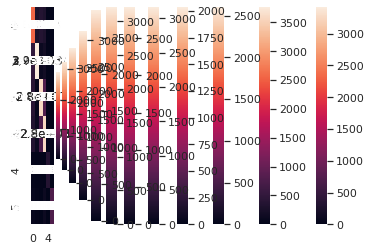

In [ ]:
#Loop for each ML: LR, NB, SVM, NeuralNet
ML ={"LR":LogisticRegression(),"NB":MultinomialNB(), "SVMLin":svm.LinearSVC(),"NeuralNet": MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)  }
#-------------------------------------------------------------------------------
# Without Stemming
#-------------------------------------------------------------------------------
# (1) Using LDA features
# (2) Using tfidf features
# (3) Using tfidf + LDA features
#-------------------------------------------------------------------------------
df = pd.DataFrame()
columns =["feature","model", "accuracy","precision", "recall", "fscore", "support", "conf_matrix", "time_train","time_predict"]
features = {"LDA":[training_ldafeatures,testing_ldafeatures],"TFIDF":[train_vectors,test_vectors],"LDA+TFIDF":[new_train,new_test]}
for featName, feat in features.items():
    for modelName, model in ML.items():
        t0 = time.time()
        model.fit(feat[0], train_labels)
        t1 = time.time()
        test_predict = model.predict(feat[1])
        t2 = time.time()
        time_train = t1-t0
        time_predict = t2-t1
        # Print results in a nice table
        print("Results for",modelName,"Feature settings ",featName )
        print("Training time: %fs; Prediction time: %fs" % (time_train, time_predict))
        print(classification_report(test_labels, test_predict))
        report = classification_report(test_labels, test_predict, output_dict=True)
        precision, recall, fscore, support = precision_recall_fscore_support(test_labels, test_predict)
        from sklearn.metrics import accuracy_score
        accuracy = accuracy_score(test_labels, test_predict)
        conf_matrix = confusion_matrix(test_labels, test_predict, labels=["Politics","Social","LocalNews","Economy", "WorldNews","Sport"])
        #print(featName,"=========>", modelName)
        #print([featName,modelName, accuracy,precision, recall, fscore, support, conf_matrix])
        result.append([featName,modelName, accuracy,precision, recall, fscore, support, conf_matrix, time_train,time_predict])
    
        
        sns.heatmap(confusion_matrix(test_labels, test_predict), annot = True)
        
df =  df.append(pd.DataFrame(result, columns=columns))
print(df)
df.to_csv("ALL_3_Feat_WOStem.csv")

IndexError: ignored

In [ ]:
results.to_csv("ALL_noSmote_noStem_TM.csv")


In [ ]:
#SMOTE 

# handling imbalance
from imblearn.over_sampling import SMOTE
#valid_x, valid_y = SMOTE().fit_resample(valid_x, valid_y)

train_vectors,train_labels = SMOTE(k_neighbors=3).fit_resample(train_vectors, train_labels)
test_vectors,test_labels = SMOTE(k_neighbors=3).fit_resample(test_vectors, test_labels)

#LDA as feature 
from sklearn.decomposition import LatentDirichletAllocation as LDA
lda = LDA(n_components=6)
lda.fit(train_vectors)
training_ldafeatures = lda.transform(train_vectors)
testing_ldafeatures = lda.transform(test_vectors)

training_ldafeatures,train_labels = SMOTE(k_neighbors=3).fit_resample(training_ldafeatures, train_labels)
testing_ldafeatures,test_labels = SMOTE(k_neighbors=3).fit_resample(testing_ldafeatures, test_labels)
# Tfidf + LDA features
import scipy
new_train = scipy.sparse.hstack((train_vectors, training_ldafeatures),format='csr')
new_test = scipy.sparse.hstack((test_vectors, testing_ldafeatures),format='csr')

new_train,train_labels = SMOTE(k_neighbors=3).fit_resample(new_train, train_labels)
new_test,test_labels = SMOTE(k_neighbors=3).fit_resample(new_test, test_labels)

In [ ]:
columns = ["Feature",'model','metric', 'Score', 'trainTime',"testTime"]
results =pd.DataFrame(columns=columns)
from sklearn.metrics import log_loss, make_scorer
LogLoss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)
result = []

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results for LR Feature settings  LDA
Training time: 3.835283s; Prediction time: 0.013436s
              precision    recall  f1-score   support

     Economy       0.54      0.86      0.66      3770
   LocalNews       0.46      0.52      0.49      3770
    Politics       0.56      0.51      0.53      3770
      Social       0.46      0.18      0.26      3770
       Sport       0.98      0.96      0.97      3770
   WorldNews       0.92      0.94      0.93      3770

    accuracy                           0.66     22620
   macro avg       0.65      0.66      0.64     22620
weighted avg       0.65      0.66      0.64     22620

Results for NB Feature settings  LDA
Training time: 0.263173s; Prediction time: 0.003153s
              precision    recall  f1-score   support

     Economy       0.50      0.89      0.64      3770
   LocalNews       0.48      0.49      0.48      3770
    Politics       0.55      0.51      0.53      3770
      Social       0.48      0.17      0.25      3770
      

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results for LR Feature settings  TFIDF
Training time: 47.014745s; Prediction time: 0.086025s
              precision    recall  f1-score   support

     Economy       0.84      0.84      0.84      3770
   LocalNews       0.90      0.89      0.90      3770
    Politics       0.77      0.79      0.78      3770
      Social       0.76      0.77      0.76      3770
       Sport       0.99      0.98      0.99      3770
   WorldNews       0.98      0.96      0.97      3770

    accuracy                           0.87     22620
   macro avg       0.87      0.87      0.87     22620
weighted avg       0.87      0.87      0.87     22620

Results for NB Feature settings  TFIDF
Training time: 0.348643s; Prediction time: 0.049604s
              precision    recall  f1-score   support

     Economy       0.71      0.89      0.79      3770
   LocalNews       0.82      0.76      0.79      3770
    Politics       0.72      0.73      0.73      3770
      Social       0.78      0.62      0.69      3770
 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results for LR Feature settings  LDA+TFIDF
Training time: 43.779156s; Prediction time: 0.096452s
              precision    recall  f1-score   support

     Economy       0.83      0.86      0.85      3770
   LocalNews       0.89      0.89      0.89      3770
    Politics       0.78      0.77      0.78      3770
      Social       0.76      0.77      0.76      3770
       Sport       0.99      0.97      0.98      3770
   WorldNews       0.97      0.95      0.96      3770

    accuracy                           0.87     22620
   macro avg       0.87      0.87      0.87     22620
weighted avg       0.87      0.87      0.87     22620

Results for NB Feature settings  LDA+TFIDF
Training time: 0.410762s; Prediction time: 0.044406s
              precision    recall  f1-score   support

     Economy       0.67      0.90      0.76      3770
   LocalNews       0.81      0.73      0.76      3770
    Politics       0.71      0.72      0.71      3770
      Social       0.78      0.58      0.67    

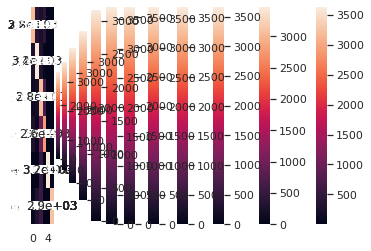

In [ ]:
#Loop for each ML: LR, NB, SVM, NeuralNet
ML ={"LR":LogisticRegression(),"NB":MultinomialNB(), "SVMLin":svm.LinearSVC(),"NeuralNet": MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)  }
#-------------------------------------------------------------------------------
# With SMOTE
#-------------------------------------------------------------------------------
# (1) Using LDA features
# (2) Using tfidf features
# (3) Using tfidf + LDA features
#-------------------------------------------------------------------------------
df = pd.DataFrame()
columns =["feature","model", "accuracy","precision", "recall", "fscore", "support", "conf_matrix", "time_train","time_predict"]
features = {"LDA":[training_ldafeatures,testing_ldafeatures],"TFIDF":[train_vectors,test_vectors],"LDA+TFIDF":[new_train,new_test]}
for featName, feat in features.items():
    for modelName, model in ML.items():
        t0 = time.time()
        model.fit(feat[0], train_labels)
        t1 = time.time()
        test_predict = model.predict(feat[1])
        t2 = time.time()
        time_train = t1-t0
        time_predict = t2-t1
        # Print results in a nice table
        print("Results for",modelName,"Feature settings ",featName )
        print("Training time: %fs; Prediction time: %fs" % (time_train, time_predict))
        print(classification_report(test_labels, test_predict))
        report = classification_report(test_labels, test_predict, output_dict=True)
        precision, recall, fscore, support = precision_recall_fscore_support(test_labels, test_predict)
        from sklearn.metrics import accuracy_score
        accuracy = accuracy_score(test_labels, test_predict)
        conf_matrix = confusion_matrix(test_labels, test_predict, labels=["Politics","Social","LocalNews","Economy", "WorldNews","Sport"])
        result.append([featName,modelName, accuracy,precision, recall, fscore, support, conf_matrix, time_train,time_predict])
    
        
        sns.heatmap(confusion_matrix(test_labels, test_predict), annot = True)
        
df =  df.append(pd.DataFrame(result, columns=columns))
print(df)
df.to_csv("WOStem_SMOTE.csv")

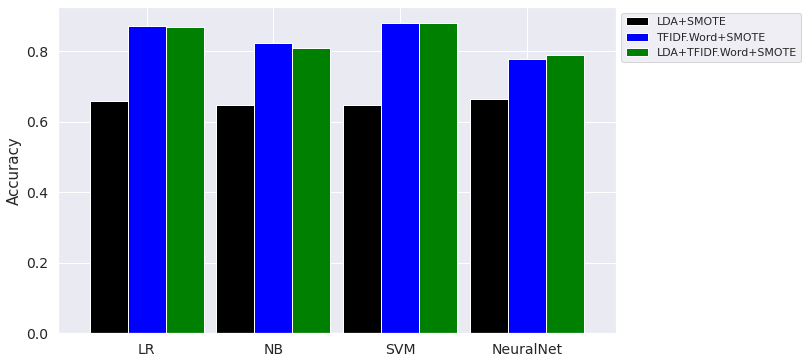

In [ ]:
# RESULT VISUALIZATION

# Bar plot features vs ML based on AVG ACCuraCY Using the results generated above with SMOTE
import pandas as pd 
import seaborn as sns
sns.set()
data=[["LR",0.66003,0.872591, 0.869363],
      ["NB",0.648276, 0.822591, 0.809019],
      ["SVM",0.648585, 0.880725, 0.880150],
      ["NeuralNet", 0.664191, 0.778515, 0.790141 ],
     ]

df=pd.DataFrame(data,columns=["ML","LDA+SMOTE","TFIDF.Word+SMOTE","LDA+TFIDF.Word+SMOTE"])

df.plot(x="ML", y=["LDA+SMOTE","TFIDF.Word+SMOTE","LDA+TFIDF.Word+SMOTE"], kind="bar",rot=0,width=0.9,figsize=(10,6),fontsize=14,color=[ 'black', 'blue', 'green'])
plt.ylabel("Accuracy",fontsize=15)
plt.xlabel("")

plt.legend(bbox_to_anchor=(1.0,1.0))
plt.show()

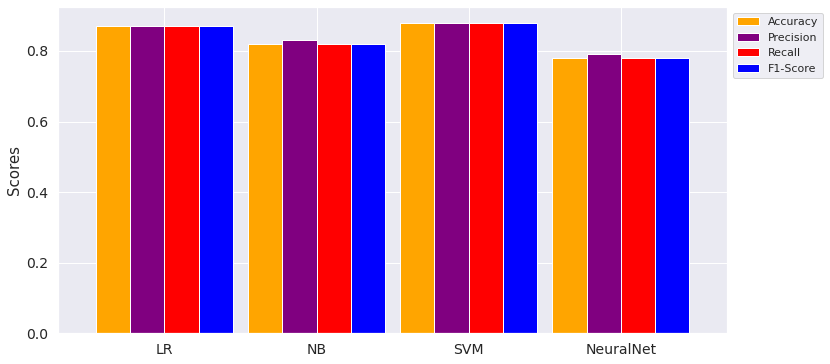

In [ ]:
# Bar plot features vs metrics (acc, p, recall, f1) of the SVM, NB, RF and NN the results generated above EXP.with smote and tfidf
import pandas as pd 
import matplotlib.pyplot as plt 
data=[["LR",0.87,0.87, 0.87,0.87],
      ["NB",0.82,0.83, 0.82,0.82],
      ["SVM",0.88,0.88,0.88,0.88],
      ["NeuralNet",0.78,0.79, 0.78, 0.78],
     ]

df=pd.DataFrame(data,columns=["ML","Accuracy","Precision","Recall","F1-Score"])
df.plot(x="ML", y=["Accuracy","Precision","Recall","F1-Score"], kind="bar",rot=0,width=0.9,figsize=(12,6),fontsize=14,color=[ 'orange','purple','red', 'blue','green'])
plt.ylabel("Scores",fontsize=15)
plt.xlabel("", fontsize=14)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

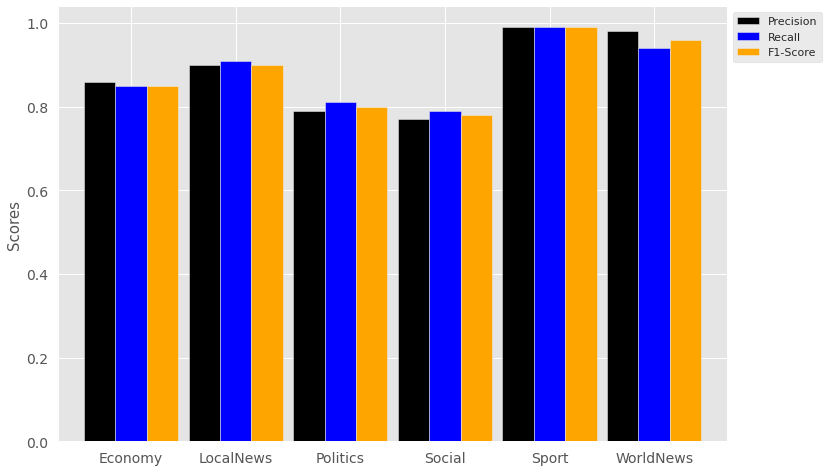

In [83]:
#Bar plot of SVMLin prediction accross categories of the results generated above EXP for TF-IDF feature set
#SVMLin +TFIDF + SMOTE
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib
matplotlib.style.use('ggplot')
data=[['Economy', 0.86,     0.85,      0.85],
      ['LocalNews', 0.90,      0.91,      0.90],    
      ['Politics', 0.79,     0.81 ,     0.80],
      ['Social', 0.77,      0.79 ,     0.78],
      ['Sport', 0.99,     0.99,      0.99],
      ['WorldNews', 0.98,      0.94,     0.96], 
     ]
     
    

df=pd.DataFrame(data,columns=["ML","Precision","Recall","F1-Score"])
df.plot(x="ML", y=["Precision","Recall","F1-Score"], kind="bar",rot=0,width=0.9,fontsize=14,figsize=(12,8),color=[ "black",'blue', 'orange','green',  'red'])
plt.ylabel("Scores",fontsize=15)
plt.xlabel("")
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

([<matplotlib.axis.YTick at 0x7ff43c538f10>,
 [Text(0, 0.5, 'Politics'),
  Text(0, 1.5, 'Social'),
  Text(0, 2.5, 'LocalNews'),
  Text(0, 3.5, 'Economy'),
  Text(0, 4.5, 'WorldNews'),
  Text(0, 5.5, 'Sport')])

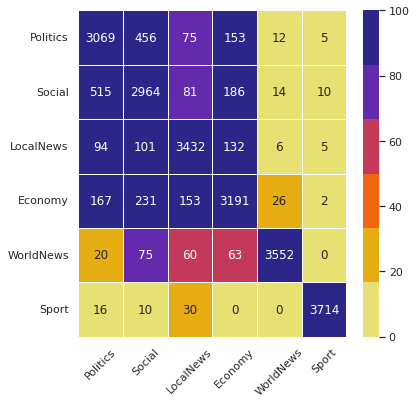

In [84]:
# Confusion matrix plot of SVMLin prediction accross categories of the results generated above for TF-IDF feature set

# SVMLin+TF-IDF+SMOTE
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm, Normalize
import seaborn as sns 
sns.set()
colormap = sns.color_palette("CMRmap_r")

con_matrix = np.array([[3069, 456, 75, 153, 12, 5],
                       [ 515, 2964, 81, 186, 14, 10],
                       [ 94, 101, 3432, 132, 6, 5], 
                       [ 167, 231, 153, 3191, 26, 2],
                       [ 20, 75, 60, 63, 3552, 0], 
                       [ 16, 10, 30, 0, 0, 3714]])


my_mask = np.zeros((con_matrix.shape[0], con_matrix.shape[0]), dtype=int)
for i in range(con_matrix.shape[0]):
    for j in range(con_matrix.shape[0]):
        my_mask[i][j] = con_matrix[i][j] == 0 

fig_dims = (6, 6)
plt.subplots(figsize=fig_dims)

sns.heatmap(con_matrix, annot=True, fmt="d", linewidths=.5,robust=True,cmap=colormap, vmin=0, vmax=100)#, cmap="Pastel1", cbar=False, mask=my_mask, vmax=15)




party_names =["Politics","Social","LocalNews","Economy", "WorldNews","Sport"]

plt.xticks(np.arange(len(party_names))+0.5, party_names, rotation=45)
plt.yticks(np.arange(len(party_names))+0.5, party_names, rotation='horizontal')

In [86]:
from sklearn.svm import LinearSVC
import pickle

# Define the ML models to be used
ML = {"SVMLin": LinearSVC()}

# Define the feature to be used
featName = "TFIDF"
feat = [train_vectors, test_vectors]

# Train the SVMLin model with the TFIDF feature
if "SVMLin" in ML:
    model = ML["SVMLin"]
    model.fit(feat[0], train_labels)

    # Save the trained model to a file named "SVMLin_model.sav"
    filename = "SVMLin_model.sav"
    pickle.dump(model, open(filename, "wb"))

# Load the trained model from the file
loaded_model = pickle.load(open(filename, "rb"))

# Make predictions with the loaded model and user input
user_input = "ከልማቱና ከሰብዓዊ ድጋፍ ባሻገር የቻይና መንግሥትና ሕዝብ በዓለም አቀፍ መድረክ ከኢትዮጵያ ጎን ተለይተው አያውቁም፡፡ ባለፉት ሁለት ዓመታት በኢትዮጵያ ውስጥ ተከስቶ የነበረውን ጦርነት ለግል ፍላጎታቸው መጠቀሚያ ለማድረግ ለማዋል የሚፈልጉ ሀገራት ጉዳዩን ከሚፈለገው በላይ በማግዘፍ በተባበሩት መንግሥታት የጸጥታው ምክር ቤት ለ12 ጊዜያት ያህል እንዲታይ ሲያደርጉ በሁሉም መድረኮች ቻይና ከኢትዮጵያና ከእውነት ጎን በመቆሟ የተጎነጎኑትን ሴራዎች ለማክሸፍ ትልቅ አቅም ሆኗል፡፡"
prediction = loaded_model.predict(user_input_vector)

print("Prediction for user input:", prediction)


Prediction for user input: ['Social']
